# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [2]:
df = pd.read_csv(r"C:\Users\Victor\Desktop\Data2 - copia\3-Machine_Learning\1-Supervisado\3-Reg&Class\6-KNN\ejercicio\data\reviews_sentiment.csv", sep=";")
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [4]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


<Axes: xlabel='sentimentValue', ylabel='Count'>

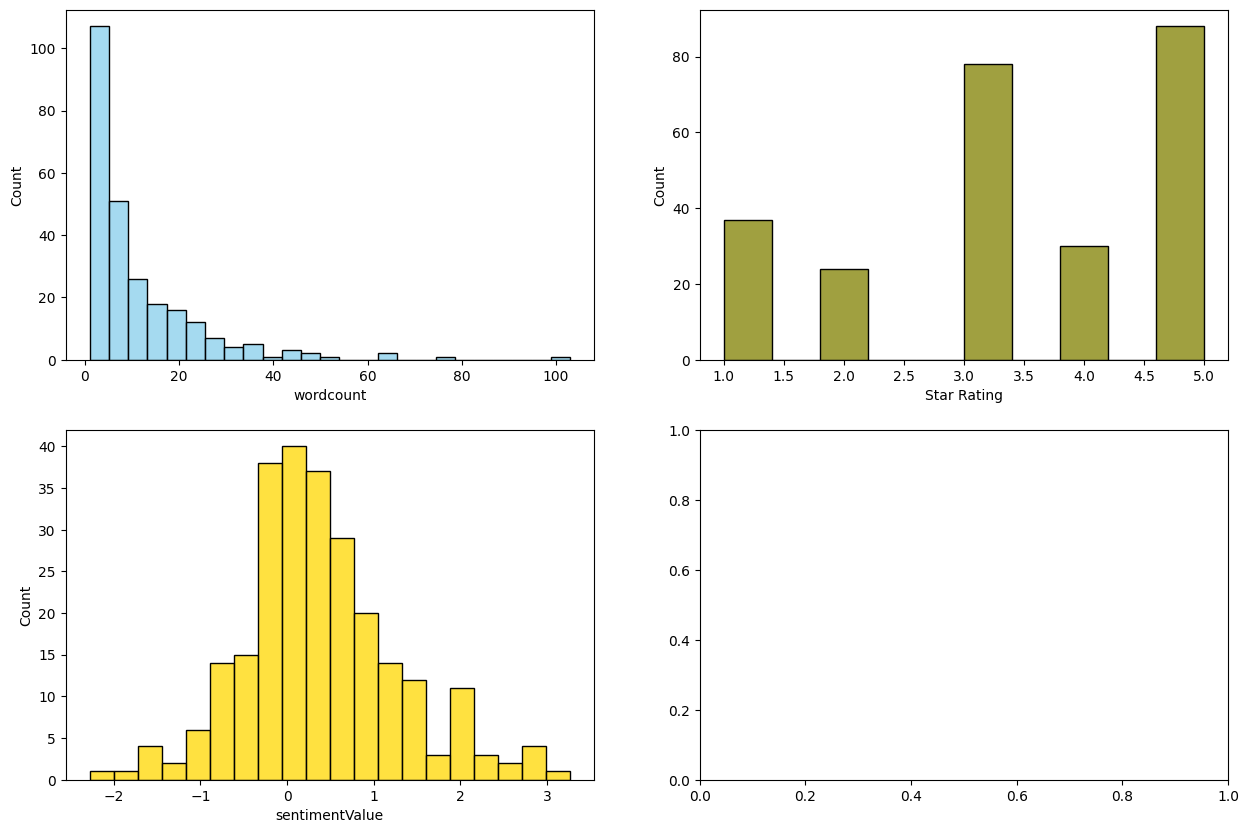

In [5]:
f, axes = plt.subplots(2, 2, figsize=(15,10))
sns.histplot(df["wordcount"] , color="skyblue", ax=axes[0, 0])
sns.histplot(df["Star Rating"] , color="olive", ax=axes[0, 1])
sns.histplot(df["sentimentValue"] , color="gold", ax=axes[1, 0])


<Axes: xlabel='Star Rating', ylabel='count'>

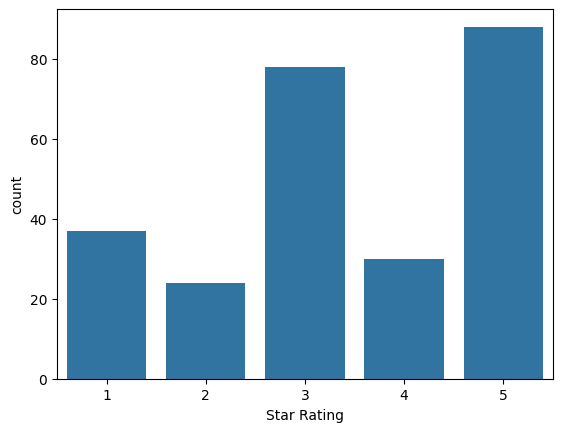

In [6]:
sns.color_palette("tab10")
sns.barplot(df["Star Rating"].value_counts())

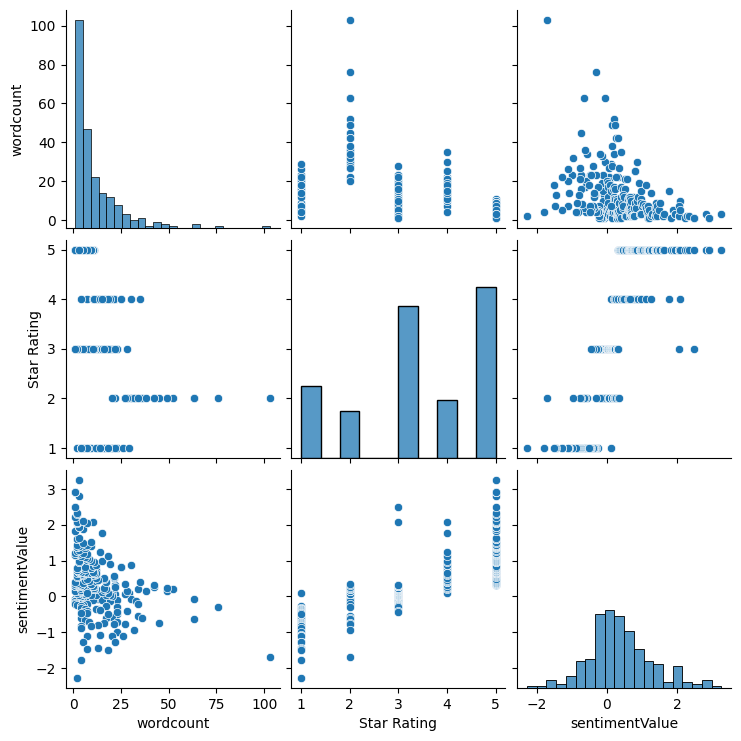

In [7]:
sns.pairplot(df)

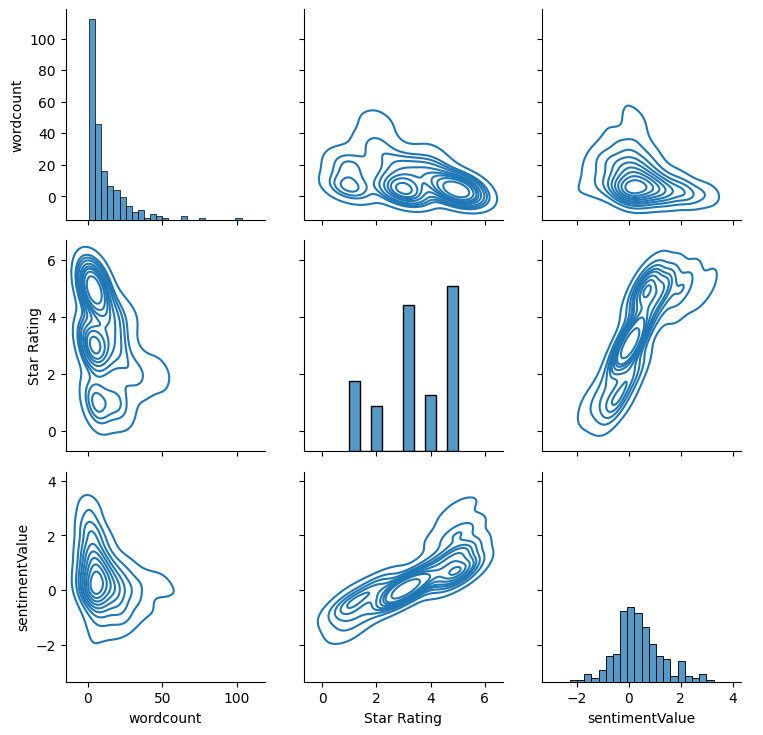

In [8]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.kdeplot)
g.add_legend()

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [9]:
# Crea el conjunto de features X solo con 'wordcount' y 'sentimentValue' y el conjunto de targe y

# Train/test con test_size = 0.2 y random_state=0

In [10]:
X = df[["wordcount","sentimentValue"]]
y = df["Star Rating"]

In [11]:
# Valores únicos de y

In [12]:
y.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# Los shapes

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(205, 2)
(52, 2)
(205,)
(52,)


In [16]:
# Mira la documentación de MinMaxScaler y escala los conjuntos X_train, X_test
# Es la misma vaina de siempre, fit del X_train y luego transform del X_train y también del X_test

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# minmax = MinMaxScaler()
# minmax.fit(X_train)# con esto cogemos el máximo y el mínimo
# minmax.transform(X_train,X_test)# con esto aplicamos la función de minmax scaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# model = SVC()
# model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.fit_transform(X_test)
# y_pred = model.predict(X_test_scaled)

## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7115384615384616

In [22]:
accuracy_score(y_train,y_pred_train)

0.8

## Resultados obtenidos

In [23]:
# Escalando los datos obtenemos un mucho mejor performance (distancia entre sus vecinos en la misma escala!)

In [24]:
from sklearn.preprocessing import StandardScaler
# st_scal = StandardScaler()
# st_scal.fit(X_train)
# minmax.transform(X_train,X_test)# con esto aplicamos la función de StandardScaler scaler

st_scal = StandardScaler()
X_train_scaled = st_scal.fit_transform(X_train)

# model = SVC()
# model.fit(X_train_scaled, y_train)

X_test_scaled = st_scal.fit_transform(X_test)
# y_pred = model.predict(X_test_scaled)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [26]:
# Predice y

In [27]:
y_pred = knn.predict(X_test_scaled)

In [28]:
accuracy_score(y_pred,y_test)

0.8076923076923077

In [29]:
# Valores únicos de y_pred

In [34]:
np.unique(y_pred)

array([1, 2, 3, 4, 5], dtype=int64)

In [33]:
set(y_pred.tolist())

{1, 2, 3, 4, 5}

array([1, 2, 3, 4, 5], dtype=int64)

In [ ]:
# Matriz de confusión del y_test y y_pred

In [35]:
from sklearn.metrics import confusion_matrix

In [38]:
len(y_test)

52

In [39]:
len(y_pred)

52

In [40]:
confusion_matrix(y_test,y_pred)

array([[ 5,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 1,  1, 14,  0,  1],
       [ 0,  0,  2,  7,  0],
       [ 0,  0,  3,  2, 15]], dtype=int64)

array([[ 5,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 1,  1, 14,  0,  1],
       [ 0,  0,  2,  7,  0],
       [ 0,  0,  3,  1, 16]], dtype=int64)

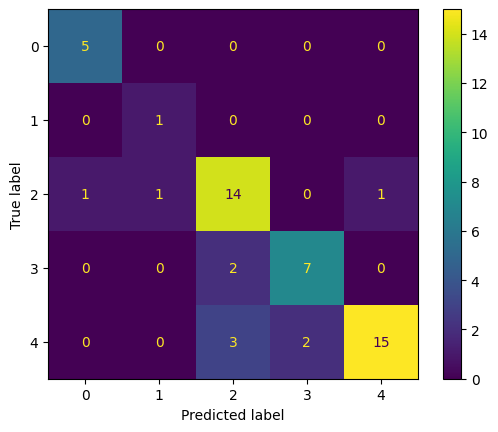

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              )
disp.plot()
plt.show()

<AxesSubplot:>

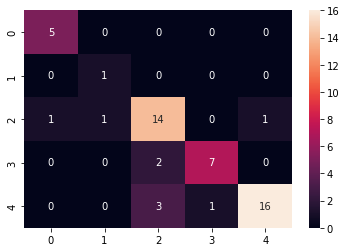

In [30]:
plt.con

## ¿Cómo obtener el mejor valor de k?
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [ ]:
# Prueba las k en un rango de 0 a 40 y guarda todos los scores en una lista

In [48]:
from sklearn.neighbors import KNeighborsClassifier
scores = []

for i in range(40):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    from sklearn.metrics import accuracy_score
    scores.append(accuracy_score(y_test,y_pred))
len(scores)

40

In [ ]:
# Haz un plt.scatter de los rangos de k y sus scores

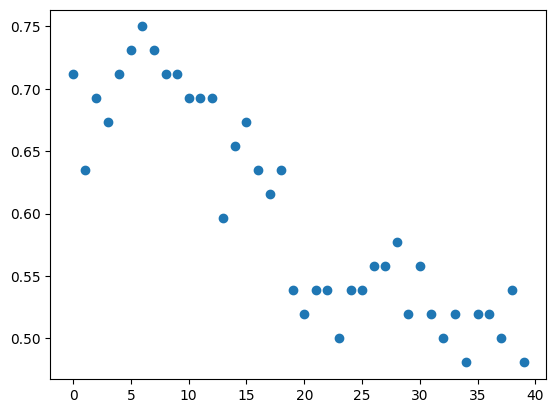

In [49]:
plt.scatter(range(40),scores)

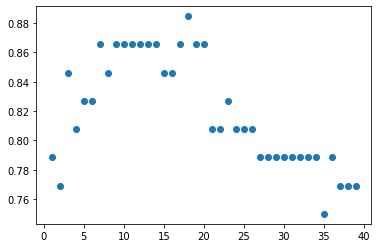

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [ ]:
# k máximo

In [51]:
max(scores)

0.75

In [55]:
scores.index(0.75)

6

array([18])

## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [ ]:
# knn con n_neighbors=18

# KFold de 10 y shuffle = True

In [ ]:
# Esta vez si lo vamos a hacer como toca (sin hacer el train_test_split)

In [ ]:
# Instancia de nuevo una MinMaxScaler() y crea transforma la X

In [58]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier


In [59]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
from sklearn.metrics import accuracy_score
scores.append(accuracy_score(y_test,y_pred))

model = BaggingClassifier(estimator=knn, n_estimators=100, random_state=0)
results_cv = cross_val_score(model, X,y, cv=10, scoring="accuracy")
results_cv

array([0.5       , 0.65384615, 0.69230769, 0.84615385, 0.69230769,
       0.57692308, 0.69230769, 0.8       , 0.72      , 0.64      ])

In [60]:
results_cv.mean()

0.6813846153846154

0.6841538461538462

0.22815031897268362

In [61]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# scaler.fit() # max min 0 1
# scaler.transform() # transform
# scaler.fit_transform() # a la vez

In [62]:
from sklearn.preprocessing import MinMaxScaler
# st_scal = StandardScaler()
# st_scal.fit(X_train)
# minmax.transform(X_train,X_test)# con esto aplicamos la función de StandardScaler scaler

mm_scal = MinMaxScaler()
X_train_scaled = mm_scal.fit_transform(X_train)

# model = SVC()
# model.fit(X_train_scaled, y_train)

X_test_scaled = mm_scal.fit_transform(X_test)
# y_pred = model.predict(X_test_scaled)

In [63]:
X_train_scaled.shape

(205, 2)

(257, 2)

In [64]:
GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

{'n_neighbors': 10}

In [85]:
# score

0.8716923076923078